# GENERATE THE SPECTRUM PLOT WITH MULTI LINES

In [1]:
###### import the necessary libraries ######    
import numpy as np
import os
from scipy.integrate import simpson
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord, SkyOffsetFrame, SpectralQuantity
from astropy.wcs.utils import skycoord_to_pixel
from astropy.modeling import models, fitting

In [2]:

#file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CF_N159_SPECT_SPAT_RES_29ARC.fits'
#file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CII_N159_SPAT_RES.fits'
file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CF_N159_SPECT_RES.fits'
#file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumSOUTH_CII_N159_SPAT_RES.fits'
#file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CF_N159_SPECT_SPAT_RES_19ARC.fits'
file3 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/CF+_DATAS/CF+_APEX_DATA/av_CF21.fits'
file4 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/CF+_DATAS/CF+_APEX_DATA/av_CF32.fits'


vmin = 200 * u.km/u.s # km/s
vmax = 270 * u.km/u.s # km/s

coord = SkyCoord('05h39m36.5s', '-69d45m35.0s', frame='icrs') # used on proposal APEX
#coord = SkyCoord('05h39m37.8s', '-69d45m09.9s', frame='icrs') # position 1 in yoko et al. 2019

# RA y Dec en formato sexagesimal (HH:MM:SS, DD:MM:SS)
ra_str = coord.ra.to_string(unit=u.hour, sep=':', precision=3, pad=True)   
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True) 
print('Coordinates to extract the spectrum (ICRS):', ra_str, dec_str)



Coordinates to extract the spectrum (ICRS): 05:39:36.500 -69:45:35.000


In [3]:
hdul1 = fits.open(file1)
print(hdul1.info())


spect1 = hdul1[0].data
print(spect1)
print('--------------------')
print(spect1.max())


header1 = hdul1[0].header
print(repr(header1))

# Cerrar los archivos FITS que abriste
hdul1.close()


Filename: C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CF_N159_SPECT_RES.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (731,)   float64   


None
[-4.08149453e-04 -4.08149453e-04 -8.71989354e-04 -1.25695882e-03
  3.28524132e-03  5.94884440e-04 -2.86530999e-04 -8.94041453e-05
 -2.56076891e-03 -1.64523440e-03 -1.57670244e-04 -1.23667981e-03
 -1.28886225e-05  7.01758866e-04  2.47285377e-03  2.60270216e-03
 -4.19054954e-04 -1.38354694e-03  2.28914363e-03  9.30003639e-04
 -2.18380665e-03 -2.40001686e-03 -3.83567027e-03 -3.55258049e-03
 -4.97544879e-03  4.41055430e-04  1.61268944e-03 -3.17526135e-03
 -1.27257445e-03  1.38539668e-03  4.86556429e-04  2.45422396e-03
  1.99440113e-03 -3.14874125e-03 -4.85202486e-03  7.91814636e-04
  1.25468383e-03  7.96043910e-04  6.26296486e-04  3.29105026e-04
 -8.10990308e-05  1.49480633e-03  1.51252119e-03 -3.26946080e-03
 -1.36842017e-03 -4.77775502e-04 -9.77503872e-04 -8.16867799e-04
  2.19533956e-03 -6.55787218e-04 -1.42866023e-03 -2.35587842e-04
  2.40428425e-03 -3.03155131e-03  4.17496861e-04  6.55091516e-03
  3.17599377e-03  1.43019685e-03  2.40775305e-03  2.80732773e-03
  2.93447398e-03  3.

In [4]:
nchan1 = header1['NAXIS1']
print('NAXIS3 file 1:', nchan1)

wcs1 = WCS(header1)
print(wcs1)


NAXIS3 file 1: 731
WCS Keywords

Number of WCS axes: 1
CTYPE : 'VRAD' 
CRVAL : -131000.0 
CRPIX : 1.0 
PC1_1  : 1.0 
CDELT : 1000.0 
NAXIS : 731  0


In [5]:
# Create the spectral axis
# --------------------------Extract necessary parameters file 1---------------------------------------
# Extract necessary parameters
RESTFRQ1 = header1['RESTFRQ'] 
UNIT1 = header1['CUNIT1']
crval1 = header1['CRVAL1']  # Reference velocity (km/s)
crpix1 = header1['CRPIX1']  # Reference pixel
cdelt1 = header1['CDELT1']  # Velocity increment (km/s/pixel)


index1 = np.arange(1, nchan1 + 1)
VEL1 = crval1 + (index1 - crpix1) * cdelt1
VEL1 = VEL1*(u.km/u.s)


# Print results
print("Spectral axis (first 5 values):", VEL1[:5])

# Filter data for the desired velocity range
# For spect1 (spectral_axis is 1D array in km/s)
mask1 = (VEL1 >= vmin) & (VEL1 <= vmax)
vel1_filtered = VEL1[mask1]
spect1_filtered = spect1[mask1]
print(vel1_filtered)

# Vel at maximum intensity
I_max11 = spect1_filtered.max()
print(I_max11)
v_max11 = vel1_filtered[np.argmax(spect1_filtered)]
print(v_max11)


Spectral axis (first 5 values): [-131. -130. -129. -128. -127.] km / s
[200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213.
 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227.
 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241.
 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.
 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269.
 270.] km / s
0.02420120626286455
237.0 km / s


### Lecture of APEX's Data spectrum

In [6]:


# Función para calcular el eje de velocidad
def freq_to_velocity(freq, restfreq):
    c = const.c.to(u.km/u.s).value  # Velocidad de la luz en km/s
    return c * (restfreq - freq) / restfreq

# Función para procesar un archivo FITS
def process_fits_file(fits_file, label):
    # Abrir el archivo FITS
    hdul = fits.open(fits_file)
    data = hdul[0].data.flatten()  # Extraer datos (intensidad, asumiendo 1D)
    header = hdul[0].header

    # Extraer información del header
    naxis1 = header['NAXIS1']  # Número de canales
    crval1 = header['CRVAL1'] *u.Hz# Frecuencia de referencia
    cdelt1 = header['CDELT1']  *u.Hz# Resolución en frecuencia
    crpix1 = header['CRPIX1']  # Canal de referencia
    restfreq = header['RESTFREQ'] *u.Hz # Frecuencia de reposo (Hz)
    bunit = header.get('BUNIT', 'K')  # Unidad de intensidad

    # Crear el eje de canales
    channels = np.arange(naxis1)
    # Calcular el eje de frecuencia (Hz)
    #freq = crval1 + (channels - (crpix1 - 1)) * cdelt1
    freq = restfreq + crval1 + (channels - crpix1) * cdelt1
    # Convertir a velocidad (km/s)
    velocity = freq_to_velocity(freq, restfreq) + 235
    
    # Cerrar el archivo
    hdul.close()
    return velocity, data, bunit, label

# Archivos FITS (reemplaza con las rutas correctas)
fits_file1 = file3
fits_file2 = file4

# Procesar ambos archivos
velocity1, data1, bunit1, label1 = process_fits_file(fits_file1, r'CF$^+$ (2-1) (29")')
velocity1 = velocity1*(u.km/u.s)
velocity2, data2, bunit2, label2 = process_fits_file(fits_file2, r'CF$^+$ (3-2) (19")')
velocity2 = velocity2*(u.km/u.s)

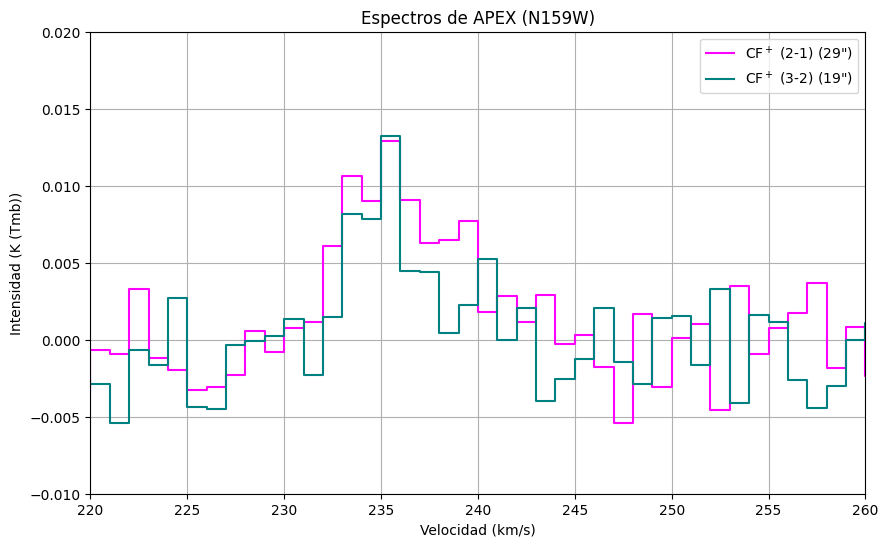

In [7]:
# Crear el plot
plt.figure(figsize=(10, 6))
plt.step(velocity1, data1, label=label1, color='magenta', alpha=1)
plt.step(velocity2, data2, label=label2, color='teal', alpha=1)
plt.xlabel('Velocidad (km/s)')
plt.ylabel(f'Intensidad ({bunit1})')
plt.title('Espectros de APEX (N159W)')
plt.xlim(220, 260)
plt.ylim(-0.01, 0.02)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Filtering

# For spect2 (VEL2 is in km/s with units)
mask3 = (velocity1 >= vmin) & (velocity1 <= vmax)
vel3_filtered = velocity1[mask3]
spect3_filtered = data1[mask3]

mask4 = (velocity2 >= vmin) & (velocity2 <= vmax)
vel4_filtered = velocity2[mask4]
spect4_filtered = data2[mask4]

# obtain the parameters of APEX Datas
#vel at maximum intensity
v_max1 = vel3_filtered[np.argmax(spect3_filtered)]
v_max2 = vel4_filtered[np.argmax(spect4_filtered)]
print('Velocity at maximum intensity (CF+ 2-1):', v_max1)
print('Velocity at maximum intensity (CF+ 3-2):', v_max2)

# Maximum intensity
I_max1 = np.max(spect3_filtered)
I_max2 = np.max(spect4_filtered)
print('Maximum intensity (CF+ 2-1):', I_max1)
print('Maximum intensity (CF+ 3-2):', I_max2)

Velocity at maximum intensity (CF+ 2-1): 235.99999996821816 km / s
Velocity at maximum intensity (CF+ 3-2): 235.99999998756044 km / s
Maximum intensity (CF+ 2-1): 0.012908132818027308
Maximum intensity (CF+ 3-2): 0.013257549980821771


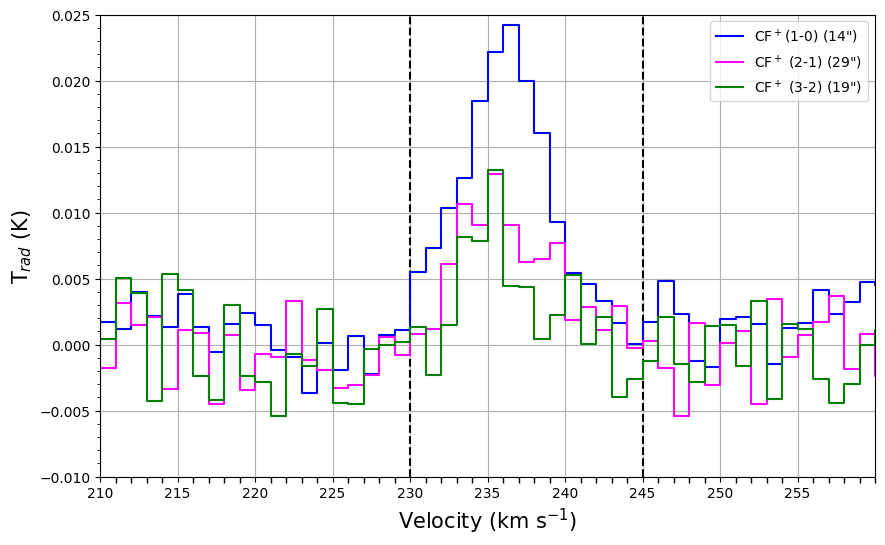

In [9]:
# Crear el plot
plt.figure(figsize=(10, 6))

plt.axvline(x=230, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=245, color='black', linestyle='--', linewidth=1.5)

#plt.step(vel3_filtered, spect3_filtered, label=r'CF$^+$(2-1) (29")' , color='cyan')
plt.step(vel1_filtered, spect1_filtered, label=r'CF$^+$(1-0) (14")', color='blue')
#plt.step(vel2_filtered, spect2_filtered, label=r'CF$^+$(1-0) (29")', color='purple')
plt.step(vel3_filtered, spect3_filtered, label=label1, color='magenta')
plt.step(vel4_filtered, spect4_filtered, label=label2, color='green')

plt.xlabel(r'Velocity (km s$^{-1}$)', fontsize=15)
plt.ylabel(r'T$_{rad}$' f' (K)', fontsize=15)
plt.title('')
plt.xlim(210, 260)
plt.ylim(-0.01, 0.025)

# Añadir ticks principales y subticks
plt.xticks(range(210, 260, 5))  # Ticks principales cada 5 unidades
plt.minorticks_on()  # Habilitar subticks
plt.tick_params(axis='x', which='minor', length=4, width=1, labelsize=5)  # Personalizar subticks
plt.tick_params(axis='x', which='major', labelsize=10)  # Ajustar tamaño de etiquetas principales


plt.legend()
plt.grid(True)
plt.show()

In [10]:
print(vel3_filtered)

[200.00000111 201.00000108 202.00000105 203.00000102 204.00000099
 205.00000095 206.00000092 207.00000089 208.00000086 209.00000083
 210.00000079 211.00000076 212.00000073 213.0000007  214.00000067
 215.00000064 216.0000006  217.00000057 218.00000054 219.00000051
 220.00000048 221.00000045 222.00000041 223.00000038 224.00000035
 225.00000032 226.00000029 227.00000025 228.00000022 229.00000019
 230.00000016 231.00000013 232.0000001  233.00000006 234.00000003
 235.         235.99999997 236.99999994 237.9999999  238.99999987
 239.99999984 240.99999981 241.99999978 242.99999975 243.99999971
 244.99999968 245.99999965 246.99999962 247.99999959 248.99999955
 249.99999952 250.99999949 251.99999946 252.99999943 253.9999994
 254.99999936 255.99999933 256.9999993  257.99999927 258.99999924
 259.99999921 260.99999917 261.99999914 262.99999911 263.99999908
 264.99999905 265.99999901 266.99999898 267.99999895 268.99999892
 269.99999889] km / s


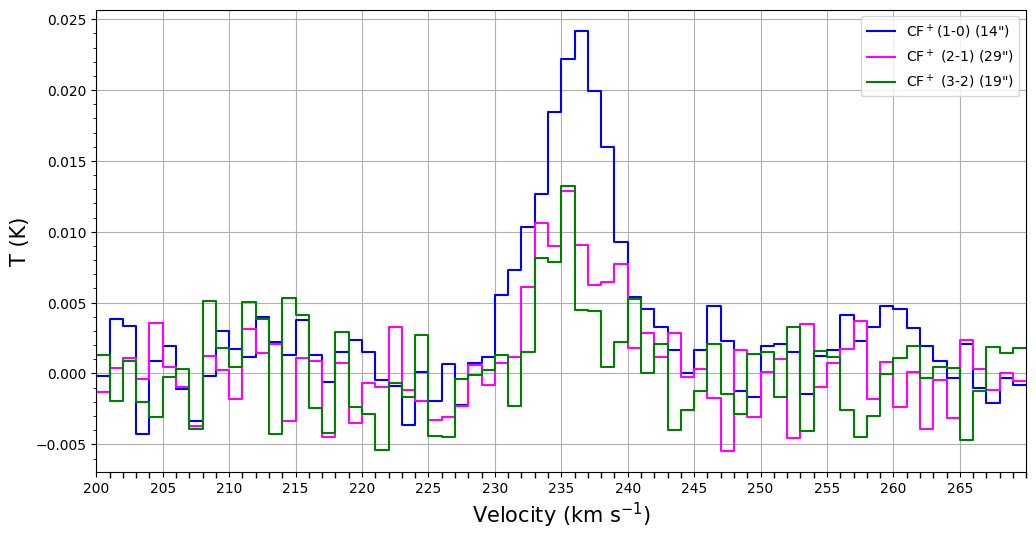

In [11]:
# Crear el plot
plt.figure(figsize=(12, 6))

#plt.axvline(x=230, color='black', linestyle='--', linewidth=1.5)
#plt.axvline(x=245, color='black', linestyle='--', linewidth=1.5)


#plt.step(vel2_filtered, spect2_filtered, label=r'CF$^+$(1-0) (29")' , color='cyan')
plt.step(vel1_filtered, spect1_filtered, label=r'CF$^+$(1-0) (14")', color='blue')
plt.step(vel3_filtered, spect3_filtered, label=label1, color='magenta')
plt.step(vel4_filtered, spect4_filtered, label=label2, color='green')

plt.xlabel(r'Velocity (km s$^{-1}$)', fontsize=15)
plt.ylabel(r'T' f' (K)', fontsize=15)
plt.title('')
plt.xlim(210, 270)
#plt.ylim(-0.01, 0.025)

# Añadir ticks principales y subticks
plt.xticks(range(200, 270, 5))  # Ticks principales cada 5 unidades
plt.minorticks_on()  # Habilitar subticks
plt.tick_params(axis='x', which='minor', length=4, width=1, labelsize=5)  # Personalizar subticks
plt.tick_params(axis='x', which='major', labelsize=10)  # Ajustar tamaño de etiquetas principales


plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Normalization of spect 1, 3 and 4

spect1_filtered_correc_norm = spect1_filtered / spect1_filtered.max()
spect3_filtered_correc_norm = spect3_filtered / spect3_filtered.max()
spect4_filtered_correc_norm = spect4_filtered / spect4_filtered.max()


data3_norm = data1 / data1.max()

## Calculate the AREA under curve

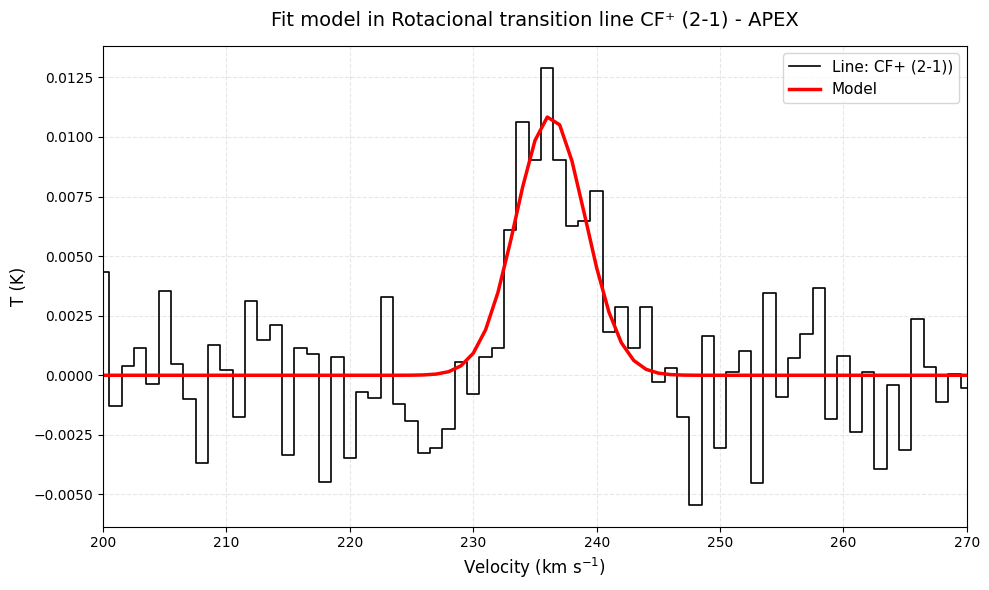

------------------
------------------
=== AJUSTE GAUSSIANO CF+ (2-1) ===
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude              mean             stddev      
                               km / s            km / s      
    -------------------- ----------------- ------------------
    0.010882066030733778 236.2594382100556 2.8184498614654347

Amplitude = 0.01088 ± 0.00112
Mean      = 236.259 ± 0.334 km/s
Stddev    = 2.818 ± 0.340 km/s
FWHM      = 6.637 ± 0.800 km/s


In [17]:
# Testing of gaussian fit on CF+ (2-1) APEX data
g_init21 = models.Gaussian1D(amplitude=I_max1, mean=v_max1, stddev=1.)
fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
g21 = fit_g(g_init21, vel3_filtered[30:44], spect3_filtered[30:44])


fig, ax = plt.subplots(figsize=(10, 6))

# 1. Datos como histograma tipo escalera (step)
ax.step(vel3_filtered, spect3_filtered, 
        where='mid', 
        color='black', 
        linewidth=1.2, 
        label='Line: CF+ (2-1))')

# 2. Modelo Gaussiano como línea continua suave
ax.plot(vel3_filtered, g21(vel3_filtered), 
        color='red', 
        linewidth=2.5, 
        label='Model')

# --- Estilo y etiquetas ---
ax.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=12)
ax.set_ylabel('T (K)', fontsize=12)  # Cambiado de 'Flux' a 'T (K)' según tu imagen
ax.set_title('Fit model in Rotacional transition line CF⁺ (2-1) - APEX', fontsize=14, pad=15)

ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# Ajustar márgenes
plt.xlim(200, 270)
plt.tight_layout()

# Mostrar
plt.show()

print('------------------')
print('------------------')
# Parámetros ajustados
errors21 = fit_g.fit_info['param_cov']
if errors21 is not None:
    param_errors21 = np.sqrt(np.diag(errors21))   # errores estándar
else:
    param_errors21 = [np.nan]*3

amp_err21, mean_err21, std_err21 = param_errors21

print("=== AJUSTE GAUSSIANO CF+ (2-1) ===")
print(g21)
print(f"\nAmplitude = {g21.amplitude.value:.5f} ± {amp_err21:.5f}")
print(f"Mean      = {g21.mean.value:.3f} ± {mean_err21:.3f} km/s")
print(f"Stddev    = {g21.stddev.value:.3f} ± {std_err21:.3f} km/s")
print(f"FWHM      = {2.355*g21.stddev.value:.3f} ± {2.355*std_err21:.3f} km/s")

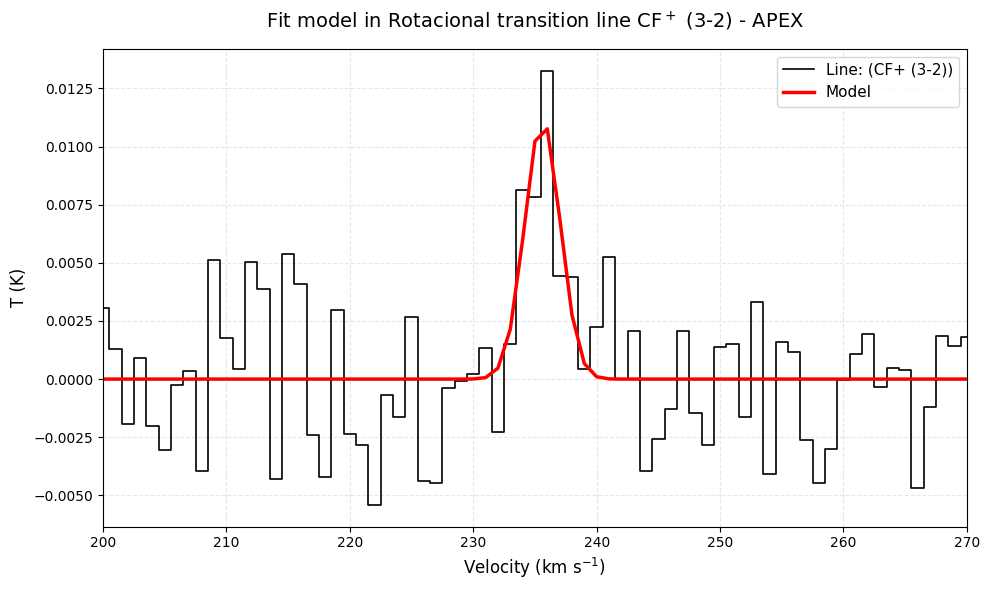

------------------
=== AJUSTE GAUSSIANO CF+ (2-1) ===
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude              mean              stddev      
                               km / s             km / s      
    -------------------- ------------------ ------------------
    0.011181180070703229 235.60288857334393 1.4317062476833173

Amplitude = 0.01118 ± 0.00196
Mean      = 235.603 ± 0.291 km/s
Stddev    = 1.432 ± 0.291 km/s
FWHM      = 3.372 ± 0.684 km/s


In [18]:
# Testing of gaussian fit on CF+ (2-1) APEX data
g_init_32 = models.Gaussian1D(amplitude=I_max2, mean=v_max2, stddev=1.)
fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
g32 = fit_g(g_init_32, vel4_filtered[30:44], spect4_filtered[30:44])


fig, ax = plt.subplots(figsize=(10, 6))

# 1. Datos como histograma tipo escalera (step)
ax.step(vel4_filtered, spect4_filtered, 
        where='mid', 
        color='black', 
        linewidth=1.2, 
        label='Line: (CF+ (3-2))')

# 2. Modelo Gaussiano como línea continua suave
ax.plot(vel4_filtered, g32(vel4_filtered), 
        color='red', 
        linewidth=2.5, 
        label='Model')

# --- Estilo y etiquetas ---
ax.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=12)
ax.set_ylabel('T (K)', fontsize=12)  # Cambiado de 'Flux' a 'T (K)' según tu imagen
ax.set_title(r'Fit model in Rotacional transition line CF$^+$ (3-2) - APEX', fontsize=14, pad=15)

ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# Ajustar márgenes
plt.xlim(200, 270)
plt.tight_layout()

# Mostrar
plt.show()

print('------------------')
# Parámetros ajustados
errors32 = fit_g.fit_info['param_cov']
if errors32 is not None:
    param_errors32 = np.sqrt(np.diag(errors32))   # errores estándar
else:
    param_errors32 = [np.nan]*3

amp_err32, mean_err32, std_err32 = param_errors32

print("=== AJUSTE GAUSSIANO CF+ (2-1) ===")
print(g32)
print(f"\nAmplitude = {g32.amplitude.value:.5f} ± {amp_err32:.5f}")
print(f"Mean      = {g32.mean.value:.3f} ± {mean_err32:.3f} km/s")
print(f"Stddev    = {g32.stddev.value:.3f} ± {std_err32:.3f} km/s")
print(f"FWHM      = {2.355*g32.stddev.value:.3f} ± {2.355*std_err32:.3f} km/s")

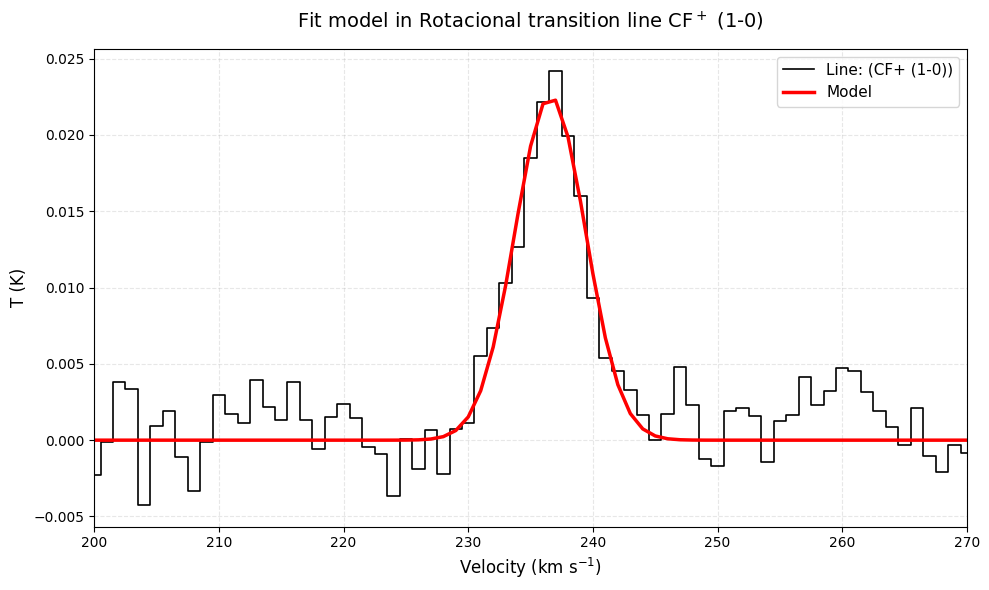

------------------
=== AJUSTE GAUSSIANO CF+ (2-1) ===
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude              mean             stddev     
                               km / s            km / s     
    -------------------- ----------------- -----------------
    0.022511943901789677 236.5838900032443 2.836408946663346

Amplitude = 0.02251 ± 0.00081
Mean      = 236.584 ± 0.118 km/s
Stddev    = 2.836 ± 0.120 km/s
FWHM      = 6.680 ± 0.282 km/s


In [15]:
# Testing of gaussian fit on CF+ (1-0) APEX data
g_init_10 = models.Gaussian1D(amplitude=I_max11, mean=v_max11, stddev=1.)
fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
g10 = fit_g(g_init_10, vel1_filtered[30:44], spect1_filtered[30:44])


fig, ax = plt.subplots(figsize=(10, 6))

# 1. Datos como histograma tipo escalera (step)
ax.step(vel1_filtered, spect1_filtered, 
        where='mid', 
        color='black', 
        linewidth=1.2, 
        label='Line: (CF+ (1-0))')

# 2. Modelo Gaussiano como línea continua suave
ax.plot(vel1_filtered, g10(vel1_filtered), 
        color='red', 
        linewidth=2.5, 
        label='Model')

# --- Estilo y etiquetas ---
ax.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=12)
ax.set_ylabel('T (K)', fontsize=12)  # Cambiado de 'Flux' a 'T (K)' según tu imagen
ax.set_title(r'Fit model in Rotacional transition line CF$^+$ (1-0)', fontsize=14, pad=15)

ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# Ajustar márgenes
plt.xlim(200, 270)
plt.tight_layout()

# Mostrar
plt.show()


print('------------------')
# Parámetros ajustados
errors10 = fit_g.fit_info['param_cov']
if errors10 is not None:
    param_errors10 = np.sqrt(np.diag(errors10))   # errores estándar
else:
    param_errors10 = [np.nan]*3

amp_err10, mean_err10, std_err10 = param_errors10

print("=== AJUSTE GAUSSIANO CF+ (2-1) ===")
print(g10)
print(f"\nAmplitude = {g10.amplitude.value:.5f} ± {amp_err10:.5f}")
print(f"Mean      = {g10.mean.value:.3f} ± {mean_err10:.3f} km/s")
print(f"Stddev    = {g10.stddev.value:.3f} ± {std_err10:.3f} km/s")
print(f"FWHM      = {2.355*g10.stddev.value:.3f} ± {2.355*std_err10:.3f} km/s")

#### Calculate the area under the line

In [21]:
u_10 = np.sqrt(2 * np.pi) * g10.stddev * g10.amplitude
u_21 = np.sqrt(2 * np.pi) * g21.stddev * g21.amplitude
u_32 = np.sqrt(2 * np.pi) * g32.stddev * g32.amplitude

# calculate the error propagation
rel_err10 = np.sqrt( (amp_err10 / g10.amplitude.value)**2 + (std_err10 / g10.stddev.value)**2 )
delta_u10 = u_10 * rel_err10
rel_err21 = np.sqrt( (amp_err21 / g21.amplitude.value)**2 + (std_err21 / g21.stddev.value)**2 )
delta_u21 = u_21 * rel_err21
rel_err32 = np.sqrt( (amp_err32 / g32.amplitude.value)**2 + (std_err32 / g32.stddev.value)**2 )
delta_u32 = u_32 * rel_err32
print(f'Integrity intensity in line emission CF+ (1-0):{u_10:.4f} ± {delta_u10:.4f}')
print(f'Integrity intensity in line emission CF+ (2-1):{u_21:.4f} ± {delta_u21:.4f}')
print(f'Integrity intensity in line emission CF+ (3-2):{u_32:.4f} ± {delta_u32:.4f}')

Integrity intensity in line emission CF+ (1-0):0.1601 km / s ± 0.0089 km / s
Integrity intensity in line emission CF+ (2-1):0.0769 km / s ± 0.0122 km / s
Integrity intensity in line emission CF+ (3-2):0.0401 km / s ± 0.0108 km / s


In [ ]:
## Using montecarlo to obtain the uncertainty in the integrated intensity

def integrated_intensity_error(g_fit, fitter, niter=10000):
    """
    Calcula u y su incertidumbre por Monte Carlo
    """
    if fitter.fit_info['param_cov'] is None:
        print("No hay matriz de covarianza → no se puede calcular error")
        return np.nan, np.nan
    
    cov = fitter.fit_info['param_cov']
    params = [g_fit.amplitude.value, g_fit.mean.value, g_fit.stddev.value]
    
    # Generamos parámetros aleatorios con correlaciones
    random_params = np.random.multivariate_normal(params, cov, size=niter)
    
    # Calculamos intensidad integrada en cada realización
    A_rand = random_params[:, 0]
    sigma_rand = random_params[:, 2]   # stddev
    u_rand = np.sqrt(2 * np.pi) * A_rand * sigma_rand
    
    u_best = np.sqrt(2 * np.pi) * g_fit.amplitude.value * g_fit.stddev.value
    u_err = np.std(u_rand)
    
    return u_best, u_err

# Aplicar a las tres líneas (cambia fit_g10, fit_g21, fit_g32 por tus objetos fitter)
u10, err10 = integrated_intensity_error(g10, fit_g)
u21, err21 = integrated_intensity_error(g21, fit_g)  
u32, err32 = integrated_intensity_error(g32, fit_g)

print(f"CF+ (1-0): {u10:.4f} ± {err10:.4f} K km/s")
print(f"CF+ (2-1): {u21:.4f} ± {err21:.4f} K km/s")
print(f"CF+ (3-2): {u32:.4f} ± {err32:.4f} K km/s")

CF+ (1-0): 0.1601 ± 0.0140 K km/s
CF+ (2-1): 0.0769 ± 0.0116 K km/s
CF+ (3-2): 0.0401 ± 0.0072 K km/s
